Model Evaluation and Comparison
In this section, we perform a comprehensive evaluation of three machine learning models—K-Nearest Neighbors (KNN), Random Forest, and a Voting Classifier—using the dataset of animal types. The primary steps involved are:

Preprocessing:

Loading the Dataset: Import the dataset and separate features from the target variable.
Feature Engineering: Add polynomial features to capture interactions between features.
Handling Class Imbalance: Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution in the training set.
Model Training and Hyperparameter Tuning:

K-Nearest Neighbors (KNN): Fine-tune the KNN model using Grid Search to find the best parameters.
Random Forest: Optimize the Random Forest model using Grid Search for better performance.
Voting Classifier: Combine KNN, Random Forest, and Support Vector Machine (SVM) using a Voting Classifier with soft voting to leverage the strengths of multiple models.
Model Evaluation:

KNN Evaluation: Assess the KNN model’s performance on the test set using accuracy, confusion matrix, and classification report.
Random Forest Evaluation: Evaluate the Random Forest model’s performance separately and compare it with KNN.
Voting Classifier Evaluation: Test the ensemble model's performance to determine its effectiveness in improving classification accuracy.
Comparison and Visualization:

Compare Models: Analyze the performance metrics of KNN, Random Forest, and the Voting Classifier to identify the best-performing model.
Visualize Results: Generate and interpret confusion matrices and classification reports for all models to gain insights into their performance.
By following these steps, we aim to understand the strengths and weaknesses of each model and determine which approach is most effective for classifying animal types in the dataset.

Voting Classifier Cross-Validation Accuracy: 1.0000

Confusion Matrix (Best KNN):
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]

Classification Report (Best KNN):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Confusion Matrix (Best Random Forest):
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  0  0  0  1]
 [ 0 

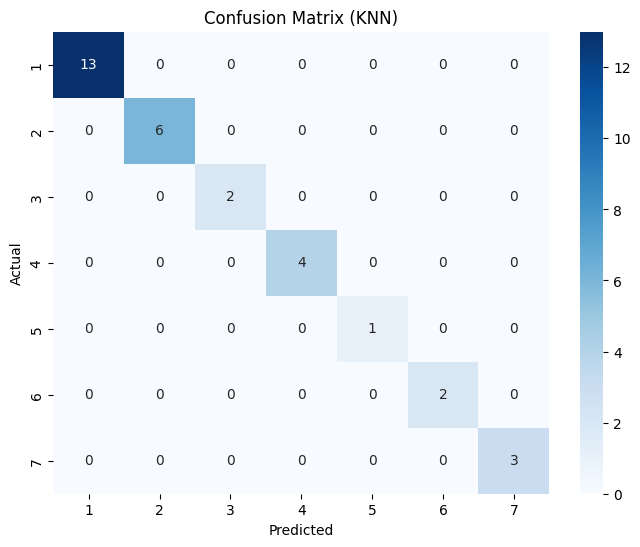

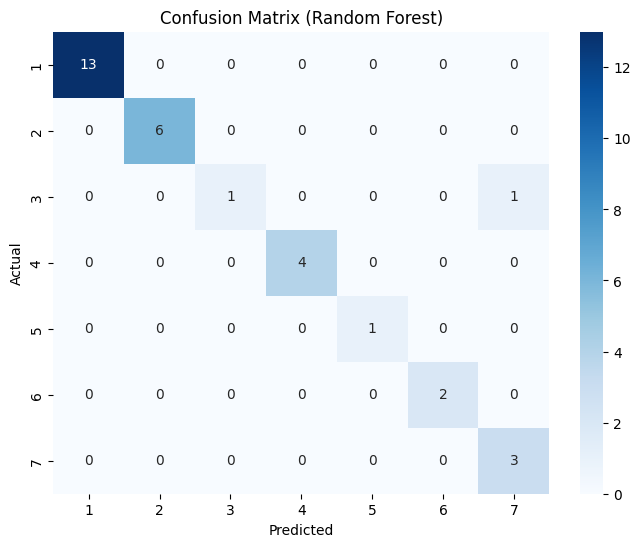

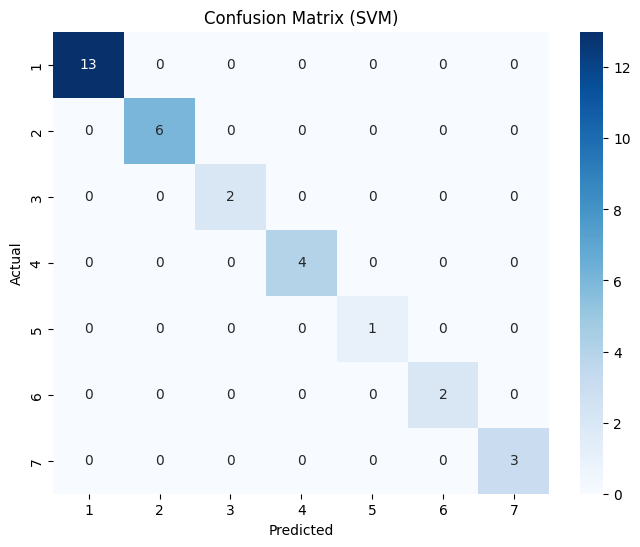

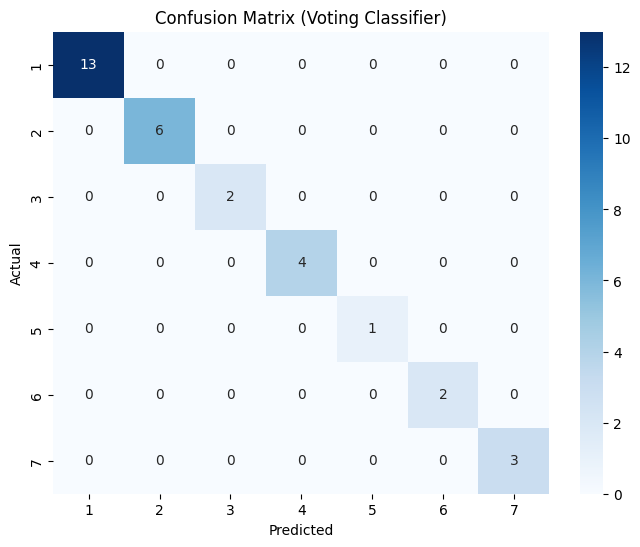

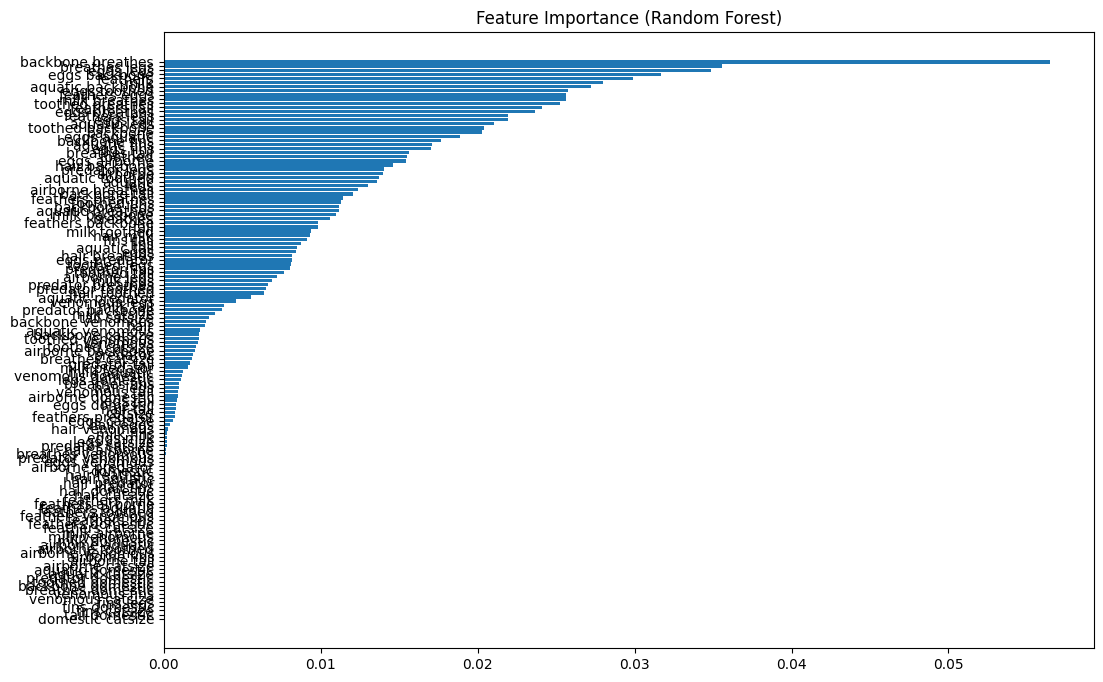

['voting_classifier_model.pkl']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import joblib

# Load dataset
file_path = r"C:\Users\lenovo\Desktop\Excelr\Data Science\Data Science Projects\Data Science Excel File and Datasets\Zoo.csv"
df = pd.read_csv(file_path)

# Separate features and target variable
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Feature Engineering: Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fine-Tune Random Forest using Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best Random Forest Model
best_rf = grid_search_rf.best_estimator_

# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_smote, y_train_smote)
best_knn = grid_search_knn.best_estimator_

# Hyperparameter Tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_smote, y_train_smote)
best_svm = grid_search_svm.best_estimator_

# Ensemble: Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('knn', best_knn), ('rf', best_rf), ('svm', best_svm)],
    voting='soft'
)

# Cross-Validation for Voting Classifier
cv_scores = cross_val_score(voting_clf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'Voting Classifier Cross-Validation Accuracy: {cv_scores.mean():.4f}')

# Fit the Voting Classifier
voting_clf.fit(X_train_smote, y_train_smote)

# Evaluate on the test set
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))

# Evaluate KNN
evaluate_model(best_knn, X_test, y_test, 'Best KNN')

# Evaluate Random Forest
evaluate_model(best_rf, X_test, y_test, 'Best Random Forest')

# Evaluate SVM
evaluate_model(best_svm, X_test, y_test, 'Best SVM')

# Evaluate Voting Classifier
evaluate_model(voting_clf, X_test, y_test, 'Voting Classifier')

# Visualizing the Results
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, best_knn.predict(X_test)), 'Confusion Matrix (KNN)')
plot_confusion_matrix(confusion_matrix(y_test, best_rf.predict(X_test)), 'Confusion Matrix (Random Forest)')
plot_confusion_matrix(confusion_matrix(y_test, best_svm.predict(X_test)), 'Confusion Matrix (SVM)')
plot_confusion_matrix(confusion_matrix(y_test, voting_clf.predict(X_test)), 'Confusion Matrix (Voting Classifier)')

# Feature Importance from Random Forest
importances = best_rf.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
feature_names = poly.get_feature_names_out()

plt.figure(figsize=(12, 8))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.show()

# Save the models
joblib.dump(best_knn, 'best_knn_model.pkl')
joblib.dump(best_rf, 'best_rf_model.pkl')
joblib.dump(best_svm, 'best_svm_model.pkl')
joblib.dump(voting_clf, 'voting_classifier_model.pkl')
